# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as ata
from MCForecastTools import MCSimulation
import json

# %matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = 'https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD'
eth_url = 'https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD'

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

# view API resonse
# print(json.dumps(btc_response_data,indent=4))

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

# view API resonse
# print(json.dumps(eth_response_data,indent=4))

# Compute current value of my crpto
my_btc_value = my_btc * btc_response_data['data']['1']['quotes']['USD']['price']
my_eth_value = my_eth * eth_response_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f'The current value of your {my_btc} BTC is ${my_btc_value:0.2f}')
print(f'The current value of your {my_eth} ETH is ${my_eth_value:0.2f}')

The current value of your 1.2 BTC is $58254.00
The current value of your 5.3 ETH is $21444.33


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
ata_api_obj = ata.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

# verify alpaca trade api obj
# ata_api_obj

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp('2021-11-29', tz='America/New_York').isoformat() 

# test date
# print(current_date)

# Set the tickers
tickers = ['AGG', 'SPY']

# test tickers
# print(tickers)

# Set timeframe to '1D' for Alpaca API
timeframe = '1D'

# test timeframe
# print(timeframe)

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = ata_api_obj.get_barset(
    tickers,
    timeframe,
    start = current_date, 
    # end = current_date, # <-- askbcs-learning asstant: suggestion to remove, commented to keep record of this solution, avoid header only pd.DataFrame
    limit = 1 # <-- set to 1 so that 1 day is returned, default setting: 1000
).df.round(decimals=2)

# Preview DataFrame
print(df_portfolio.info())
print()
display(df_portfolio)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2021-12-10 00:00:00-05:00 to 2021-12-10 00:00:00-05:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (AGG, open)    1 non-null      float64
 1   (AGG, high)    1 non-null      float64
 2   (AGG, low)     1 non-null      float64
 3   (AGG, close)   1 non-null      float64
 4   (AGG, volume)  1 non-null      int64  
 5   (SPY, open)    1 non-null      float64
 6   (SPY, high)    1 non-null      float64
 7   (SPY, low)     1 non-null      float64
 8   (SPY, close)   1 non-null      float64
 9   (SPY, volume)  1 non-null      int64  
dtypes: float64(8), int64(2)
memory usage: 88.0 bytes
None



AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-12-10 00:00:00-05:00  114.37  114.51  114.22  114.24  6263328  469.23   

                                                            
                            high     low   close    volume  
time                                                        
2021-12-10 00:00:00-05:00  470.9  466.51  470.72  64958435

In [9]:
# Pick AGG and SPY close prices
# agg_close_price = float(df_portfolio['AGG']['close'])
# spy_close_price = float(df_portfolio['SPY']['close'])

agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f'Current AGG closing price: ${agg_close_price}')
print(f'Current SPY closing price: ${spy_close_price}')

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f'The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}')
print(f'The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}')

The current value of your 200 AGG shares is $22848.00
The current value of your 50 SPY shares is $23536.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value
stock_assets = my_spy_value + my_agg_value

# check vars
# print(crypto_assets)
# print(stock_assets)

# Create savings DataFrame
df_savings_value = [crypto_assets, stock_assets]
df_savings = pd.DataFrame(df_savings_value, index = ['Crypto', 'Shares'], columns=['Value'])

# Display savings DataFrame
display(df_savings)

,Value
Crypto,79698.33
Shares,46384.00


<AxesSubplot:title={'center':'Savings Health Analysis'}, ylabel='Value'>

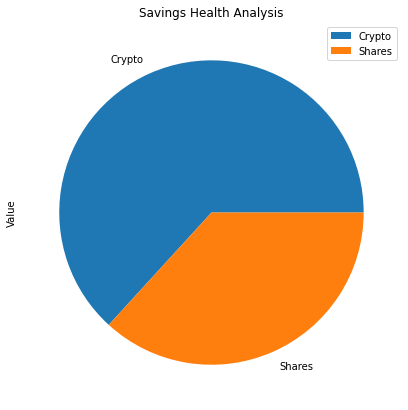

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='Value', title= 'Savings Health Analysis', figsize = (7, 7))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['Value'].sum()

# verify pd.df.sum()
# total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f'Your Total Savings of ${total_savings} is greater than your Emergency Funds. Congratulations!')
elif total_savings == emergency_fund:
    print(f'Your Total Savings of ${total_savings} matches your ${emergency_fund} in Emergency Funds. You met your financial goal.')
else:
    print(f'${(emergency_fund - total_savings)} to reach your finanacal target. Almost there.')

Your Total Savings of $126082.33 is greater than your Emergency Funds. Congratulations!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

# 5 years' worth of historical data for SPY and AGG
df_stock_data = ata_api_obj.get_barset(
    tickers,
    timeframe,
    start = start_date, 
    end = end_date,
    limit = 1000
).df.round(decimals=2)

# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2017-05-11 00:00:00-04:00  108.35  108.54  108.34  108.52  1773499  239.35   
2017-05-12 00:00:00-04:00  108.81  108.94  108.78  108.92  1136553  239.09   
2017-05-15 00:00:00-04:00  108.85  108.94  108.82  108.89  1620264  239.47   
2017-05-16 00:00:00-04:00  108.88  109.10  108.88  109.00  1394153  240.62   
2017-05-17 00:00:00-04:00  109.35  109.60  109.28  109.56  2263851  238.10   

                                                              
                             high     low   close     volume  
time                                                          
2017-05-11 00:00:00-04:00  239.57  238.13  239.41   45435690  
2017-05-12 00:00:00-04:00  239.21  238.67  239.03   35283567  
2017-05-15 00:00:00-04:00  240.44  239.45  240.24   42230620  
2017-05-16 00:00:00-04:00  240.67  239.63  240.10   37206183  
2017-05-17 00:00:00-04:00  238.64  235.75  235.85  118613594

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# vars to specify weights
agg_40 = .40
spy_60 = .60

# Monte Carlo simulation
mcs_30a_cum_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [agg_40, spy_60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
mcs_30a_cum_returns.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2017-05-11 00:00:00-04:00  108.35  108.54  108.34  108.52  1773499   
2017-05-12 00:00:00-04:00  108.81  108.94  108.78  108.92  1136553   
2017-05-15 00:00:00-04:00  108.85  108.94  108.82  108.89  1620264   
2017-05-16 00:00:00-04:00  108.88  109.10  108.88  109.00  1394153   
2017-05-17 00:00:00-04:00  109.35  109.60  109.28  109.56  2263851   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.41   
2017-05-12 00:00:00-04:00     0.003686  239.09  239.21  238.67  239.03   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.24   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.10   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.85   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005062  
2017-05-16 00:00:00-04:00   37206183    -0.000583  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

#note: running this MCForecastTools function causes the PerformanceWarning, refered: https://github.com/twopirllc/pandas-ta/issues/340

mcs_30a_cum_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mbl/src/fintech/Assignments-local-UTOR-VIRT-FIN-PT-11-2021-U-C/unit-5-financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006601,1.003050,0.989254,0.991648,0.985619,0.997209,1.004146,1.009682,0.997904,0.998222,...,0.989022,0.997230,0.991415,0.989795,0.995130,0.998204,0.989044,0.996590,1.001822,0.999468
2,0.998856,0.996239,0.990431,0.981961,0.992105,0.992690,1.009184,0.992478,1.004132,0.994446,...,0.991775,0.993079,0.985957,0.994534,0.993717,0.996041,0.988864,0.984363,1.007046,1.006666
3,1.008476,0.984968,0.992024,0.989074,0.988079,0.987353,1.026386,0.988429,0.990074,0.994033,...,0.999388,0.985132,0.989182,0.986033,0.986307,1.006087,0.985805,0.982930,1.008440,1.002709
4,1.022556,0.989103,0.987762,0.988815,0.984879,0.980979,1.032919,0.987837,0.994244,0.990185,...,0.999478,0.994809,0.997108,0.983491,0.997759,1.012582,1.003848,0.976223,1.001690,1.013250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.962603,14.467485,8.521180,34.839558,102.292989,19.973182,21.005550,45.704054,16.287893,40.134052,...,18.011230,13.105465,9.265859,45.320251,16.359385,34.449719,18.256008,23.848827,5.617589,12.364869
7557,20.886372,14.395401,8.559517,34.027778,102.966766,20.029126,21.063163,45.815572,16.379482,40.460809,...,17.943680,13.230330,9.364076,45.091251,16.167263,33.933476,18.294091,23.858808,5.484627,12.314746
7558,21.168199,14.281443,8.582544,34.051357,102.521676,20.197768,21.096752,45.369484,16.531898,40.716001,...,17.720304,13.319370,9.314510,45.098580,16.195050,33.881423,18.329474,24.009317,5.540175,12.160406
7559,21.397048,14.235293,8.560240,34.079402,102.358662,20.475011,21.188073,45.125899,16.470721,40.712735,...,17.834323,13.463367,9.250119,45.018552,16.201657,33.712355,18.537061,24.274926,5.629445,12.171865


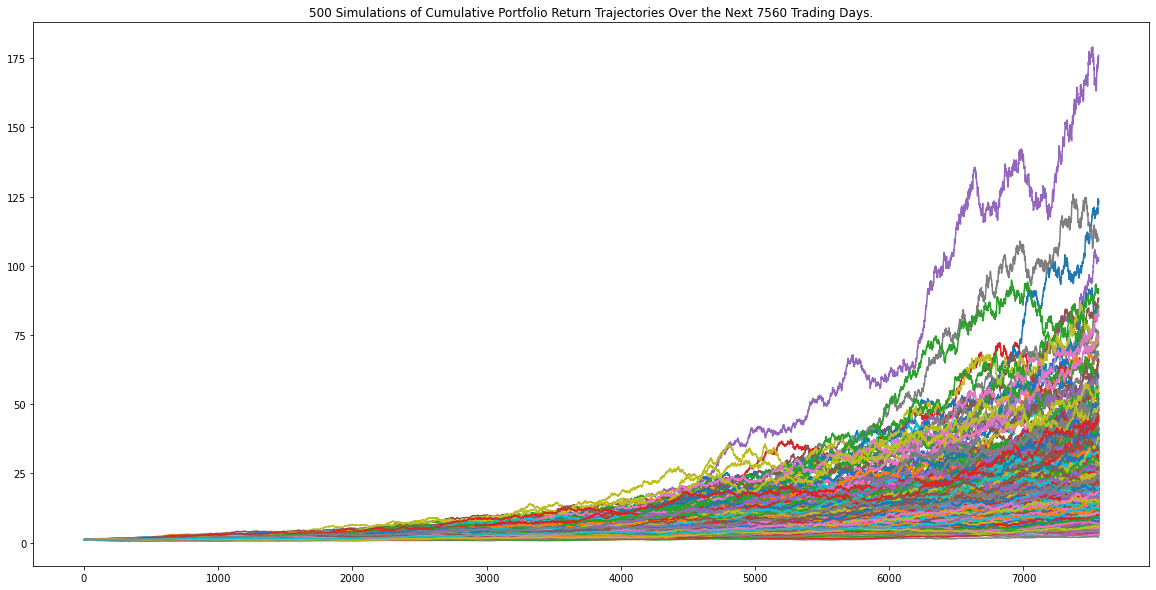

In [19]:
# Plot simulation outcomes
mcs_30a_line_plot = mcs_30a_cum_returns.plot_simulation()

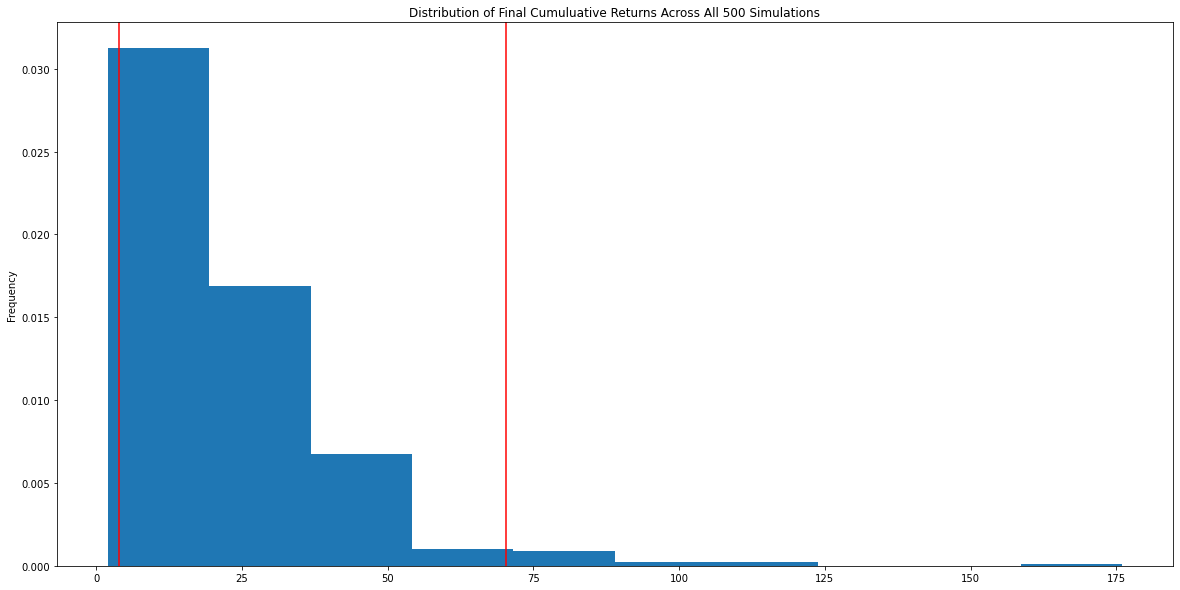

In [20]:
# Plot probability distribution and confidence intervals
mcs_30a_pdci = mcs_30a_cum_returns.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
mcs_30a_summary = mcs_30a_cum_returns.summarize_cumulative_return()

# Print summary statistics
print(mcs_30a_summary)

count           500.000000
mean             22.895164
std              18.234495
min               1.942857
25%              10.786405
50%              18.140502
75%              29.588994
max             176.034303
95% CI Lower      3.899336
95% CI Upper     70.305591
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mcs_30a_summary[8]*initial_investment,2)
ci_upper = round(mcs_30a_summary[9]*initial_investment,2)

# Print results
print(f'There is a 95% chance that an initial investment of ${initial_investment} in the portfolio'
      f' over the next 30 years will end within in the range of'
      f' ${ci_lower} and ${ci_upper}')

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77986.72 and $1406111.82


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mcs_30a_summary[8]*initial_investment,2)
ci_upper = round(mcs_30a_summary[9]*initial_investment,2)

# Print results
print(f'There is a 95% chance that an initial investment of ${initial_investment} in the portfolio'
      f' over the next 30 years will end within in the range of'
      f' ${ci_lower} and ${ci_upper}')

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $116980.09 and $2109167.73


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mcs_5a_cum_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [agg_40, spy_60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mcs_5a_cum_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mbl/src/fintech/Assignments-local-UTOR-VIRT-FIN-PT-11-2021-U-C/unit-5-financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997100,0.992314,0.986658,0.997144,1.000906,0.988783,1.003429,1.004704,0.986790,1.008999,...,0.993873,1.006369,1.007331,1.012809,0.995768,1.000462,1.001493,0.997353,1.008526,1.011346
2,0.991712,0.990882,0.990074,0.993427,1.003645,0.993345,1.009100,0.999839,0.976948,1.011598,...,0.990054,1.010478,1.014385,1.005854,1.003677,0.996041,1.017506,0.998518,1.014729,1.003115
3,0.990322,0.995631,0.978517,1.001878,1.000161,0.981010,1.008437,0.992157,0.965404,1.016500,...,0.993580,1.006983,1.023490,1.000710,1.005119,0.989060,1.007440,0.996808,1.014572,1.007038
4,0.999180,0.995874,0.984219,0.998412,1.008514,0.979891,1.009878,0.986011,0.964112,1.006354,...,1.000075,1.017937,1.016544,1.001216,1.005509,0.992434,1.008323,1.000492,1.017920,1.006127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.790805,2.022960,1.049169,1.495112,1.428426,1.374259,1.059343,1.566283,2.798710,1.059276,...,2.037660,1.605377,1.832900,2.220671,2.091154,1.633408,1.015570,1.712861,1.110262,1.832883
1257,1.783587,1.988219,1.058043,1.506158,1.436772,1.386959,1.046881,1.572409,2.787823,1.056780,...,2.025590,1.607999,1.831776,2.188660,2.090315,1.660749,1.021686,1.720008,1.110155,1.844159
1258,1.805037,1.981647,1.084528,1.505621,1.443454,1.394824,1.034699,1.561048,2.773332,1.068340,...,2.036177,1.607318,1.852695,2.161986,2.078307,1.649837,1.012542,1.715379,1.122853,1.844524
1259,1.816139,1.981633,1.064638,1.516786,1.460430,1.377617,1.030595,1.556233,2.808751,1.061966,...,2.033501,1.592198,1.862623,2.157436,2.081350,1.651726,1.013715,1.702382,1.126011,1.848887


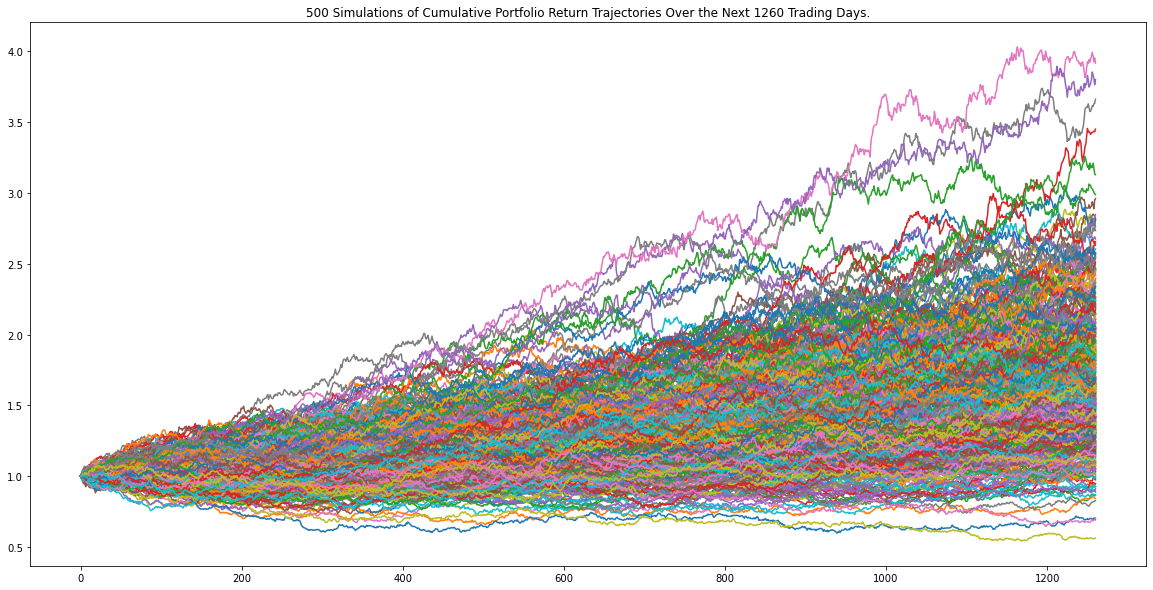

In [26]:
# Plot simulation outcomes
mcs_5a_cum_plot = mcs_5a_cum_returns.plot_simulation()

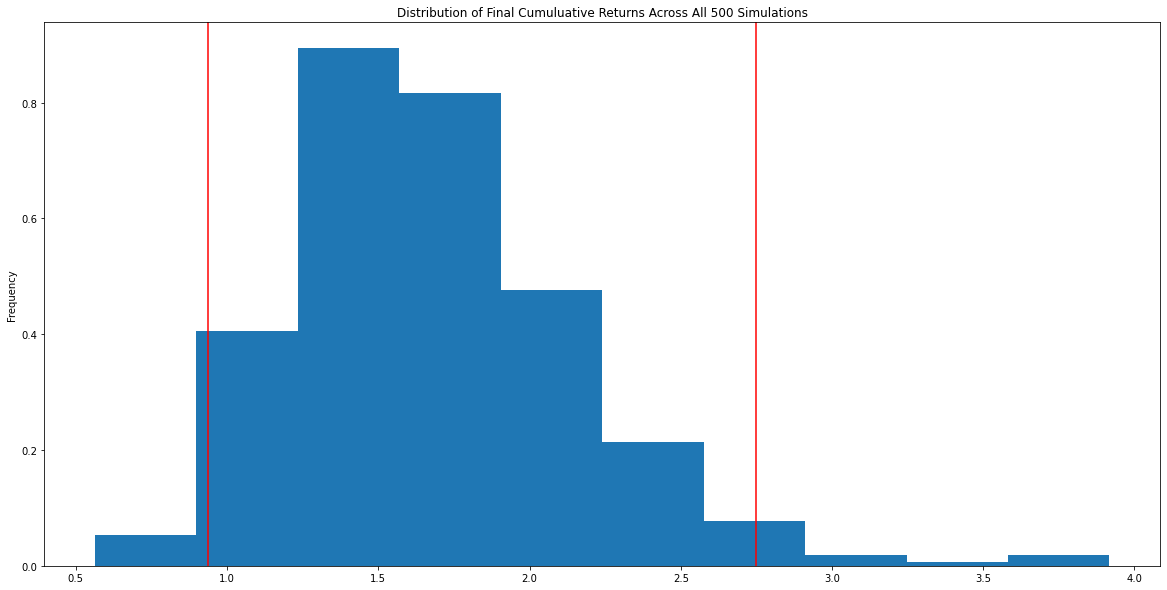

In [27]:
# Plot probability distribution and confidence intervals
mcs_5a_pdci = mcs_5a_cum_returns.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
mcs_5a_summary = mcs_5a_cum_returns.summarize_cumulative_return()

# Print summary statistics
print(mcs_5a_summary)

count           500.000000
mean              1.679831
std               0.472565
min               0.563137
25%               1.336264
50%               1.619296
75%               1.938719
max               3.917338
95% CI Lower      0.937455
95% CI Upper      2.749174
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_5a = 20000 * 2.0

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mcs_5a_summary[8]*initial_investment_5a,2)
ci_upper_five = round(mcs_5a_summary[9]*initial_investment_5a,2)

# Print results
print(f'There is a 95% chance that an initial investment of ${initial_investment_5a} in the portfolio'
      f' over the next 5 years will end within in the range of'
      f' ${ci_lower_five} and ${ci_upper_five}')

There is a 95% chance that an initial investment of $40000.0 in the portfolio over the next 5 years will end within in the range of $37498.21 and $109966.95


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mcs_10a_cum_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [agg_40, spy_60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mcs_10a_cum_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mbl/src/fintech/Assignments-local-UTOR-VIRT-FIN-PT-11-2021-U-C/unit-5-financial-planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997883,1.016261,1.010677,0.995658,0.989751,0.999915,1.005500,0.997100,1.000324,1.017720,...,1.006991,0.997737,0.998283,0.996894,1.001114,0.991076,1.001113,1.018384,1.004525,1.001311
2,0.995483,1.016266,1.012994,0.989535,0.986365,0.989890,0.999661,0.990670,1.013929,1.020400,...,0.994460,0.999900,0.998779,0.982994,1.000520,0.992163,0.992717,1.018129,1.014769,1.014805
3,0.996468,1.007413,1.012304,0.982122,0.985825,0.989741,0.991753,0.996225,1.018216,1.024345,...,0.983266,1.005704,0.992019,0.990217,0.988523,0.999944,0.997726,1.008325,1.017837,1.023666
4,0.994106,1.029189,1.025166,0.991335,0.990230,0.997013,1.003770,0.982180,1.014973,1.019481,...,0.990276,1.005238,0.997015,0.986375,0.996698,0.998498,0.993286,1.010108,1.018273,1.036536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.840164,2.292766,1.349090,1.980785,2.748798,2.194884,2.715681,2.151837,5.944651,2.510273,...,3.115715,5.779054,2.462329,1.113322,1.794082,1.789361,2.256717,9.247052,3.345079,1.748405
2517,1.808907,2.294912,1.369845,1.976813,2.745667,2.216709,2.737745,2.185438,5.873151,2.515874,...,3.081147,5.776884,2.447130,1.114709,1.812368,1.779219,2.290110,9.313247,3.413047,1.727065
2518,1.820972,2.299751,1.398005,1.955680,2.759764,2.204082,2.751814,2.189645,5.841732,2.536662,...,3.110706,5.706699,2.473057,1.101061,1.814209,1.778575,2.280383,9.378668,3.435827,1.726226
2519,1.798796,2.305572,1.366405,1.957456,2.741853,2.187867,2.731723,2.207199,5.816822,2.573557,...,3.073577,5.644268,2.478279,1.092614,1.827800,1.770493,2.301460,9.326479,3.428846,1.714870


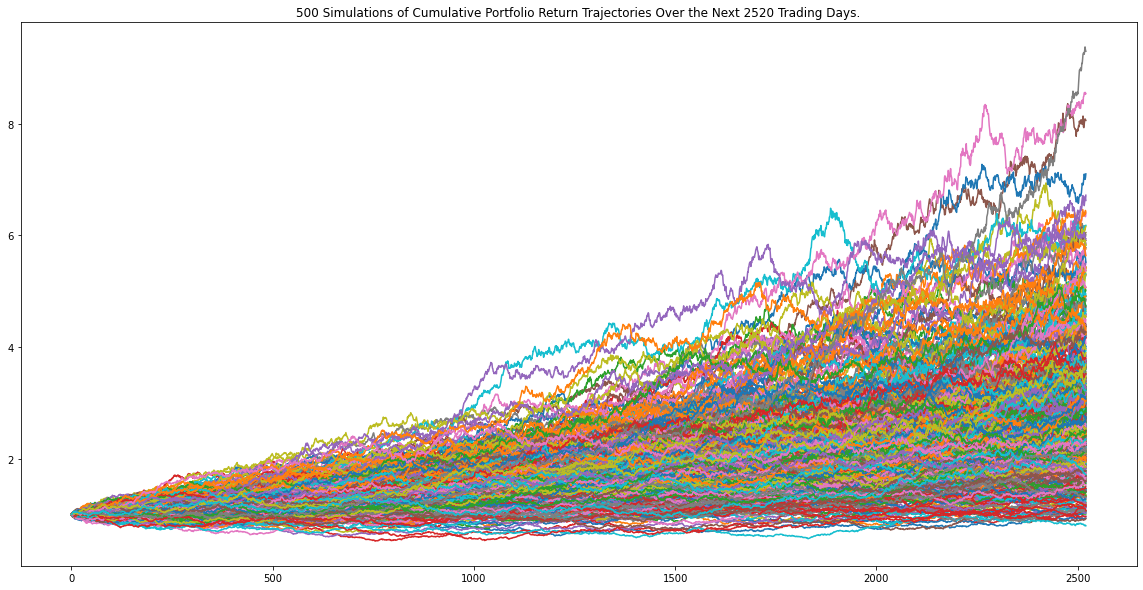

In [32]:
# Plot simulation outcomes
mcs_10a_cum_plot = mcs_10a_cum_returns.plot_simulation()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
mcs_10a_summary = mcs_10a_cum_returns.summarize_cumulative_return()

# Print summary statistics
print(mcs_10a_summary)

count           500.000000
mean              2.836723
std               1.235576
min               0.797236
25%               2.018999
50%               2.615812
75%               3.280291
max               9.300052
95% CI Lower      1.071225
95% CI Upper      5.929532
Name: 2520, dtype: float64


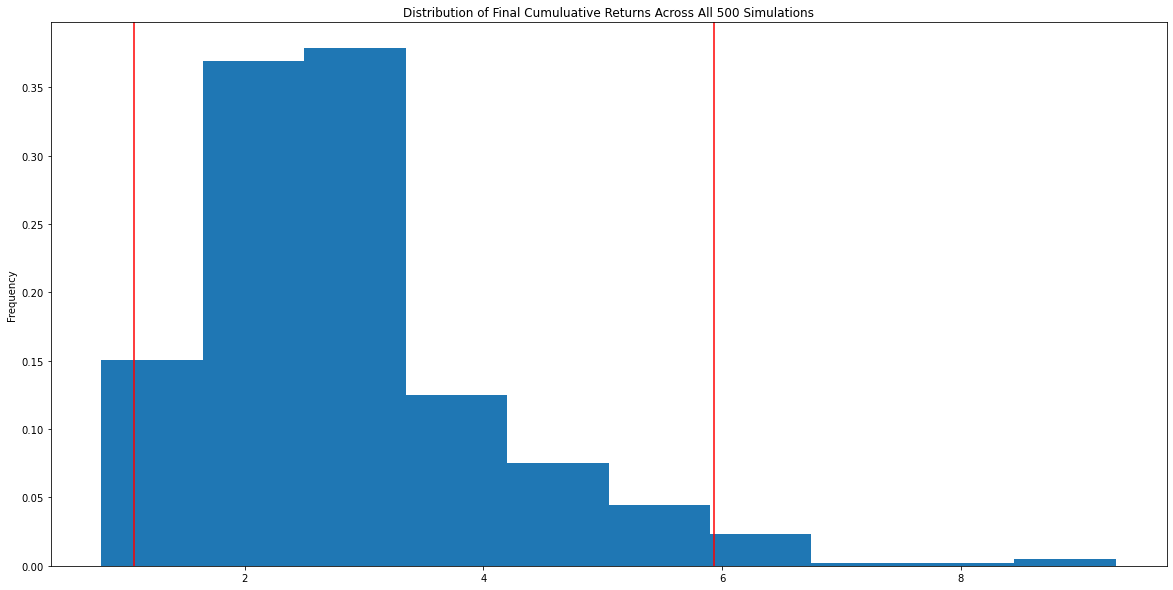

In [34]:
# Plot probability distribution and confidence intervals
mcs_10a_cum_plot = mcs_10a_cum_returns.plot_distribution()

In [35]:
# Set initial investment
initial_investment_10a = 20000 * 1.75

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mcs_10a_summary[8]*initial_investment_10a,2)
ci_upper_ten = round(mcs_10a_summary[9]*initial_investment_10a,2)



# Print results
print(f'There is a 95% chance that an initial investment of ${initial_investment_10a} in the portfolio'
      f' over the next 10 years will end within in the range of'
      f' ${ci_lower_ten} and ${ci_upper_ten}')

There is a 95% chance that an initial investment of $35000.0 in the portfolio over the next 10 years will end within in the range of $37492.89 and $207533.62
